In [97]:
# pip install yfinance

In [98]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [99]:
jpy_usd = yf.download(developed_cur, period = '1y')

[*********************100%%**********************]  7 of 7 completed


In [100]:
## list the currencies

# developed_cur = ["JPYUSD=X","JPYCAD=X","JPYCHF=X","JPYEUR=X","JPYAUD=X","JPYGBP=X"] #"JPYSGD=X",
# em_cur =        ["JPYTHB=X","JPYKRW=X","JPYINR=X","JPYSAR=X","JPYZAR=X","JPYBRL=X","JPYBRL=X"] #"JPYVND=X","JPYPHP=X","JPYEGP=X","JPYMNX=X"
developed_cur  = ["THBUSD=X","THBCAD=X","THBJPY=X","THBCHF=X","THBEUR=X","THBAUD=X","THBGBP=X"]
em_cur =        ["THBKRW=X","THBCNY=X","THBINR=X","THBZAR=X"] 

currencies = developed_cur + em_cur

In [101]:
## download currenies data
data = yf.download(currencies, period='1y')

# Resampling to monthly frequency + calculating monthly returns
monthly_data = data['Close'].resample('M').last()
monthly_returns = monthly_data.pct_change().dropna()

# Ranking the currencies 
ranked_returns = monthly_returns.rank(axis=1, ascending=False)


[*********************100%%**********************]  11 of 11 completed


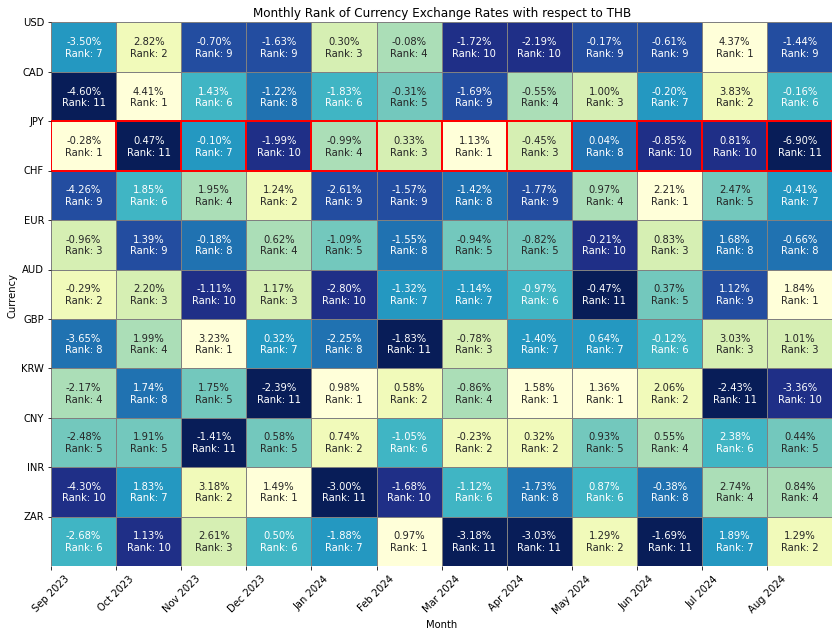

In [102]:
# annotation labels
annot_labels = monthly_returns.applymap(lambda x: f"{x:.2%}") + "\n" + ranked_returns.applymap(lambda x: f"Rank: {int(x)}")

# rank chart
plt.figure(figsize=(14, 10))

# heatmap with custom colors to highlight JPY related boxes
ax = sns.heatmap(ranked_returns.T, annot=annot_labels.T, fmt='', cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='gray')

# Highlight JPY related boxes
for i in range(len(ranked_returns.index)):
    for j in range(len(currencies)):
        if 'JPY' in currencies[j]:
            ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='red', lw=2))

plt.title('Monthly Rank of Currency Exchange Rates with respect to THB')
plt.xlabel('Month')
plt.ylabel('Currency')
plt.xticks(ticks=range(len(ranked_returns.index)), labels=[date.strftime('%b %Y') for date in ranked_returns.index], rotation=45)
plt.yticks(ticks=range(len(currencies)), labels=[currency.replace('=X', '').replace('THB', '') for currency in currencies], rotation=0, va='center')

plt.show()